In [1]:
import pandas as pd
import numpy as np

In [2]:
uid_train = pd.read_csv('../data/uid_train.txt',sep='\t',header=None,names=('uid','label'))
voice_train = pd.read_csv('../data/voice_train.txt',sep='\t',header=None,names=('uid','opp_num','opp_head','opp_len','start_time','end_time','call_type','in_out'),dtype={'start_time':str,'end_time':str})
sms_train = pd.read_csv('../data/sms_train.txt',sep='\t',header=None,names=('uid','opp_num','opp_head','opp_len','start_time','in_out'),dtype={'start_time':str})
wa_train = pd.read_csv('../data/wa_train.txt',sep='\t',header=None,names=('uid','wa_name','visit_cnt','visit_dura','up_flow','down_flow','wa_type','date'),dtype={'date':str})

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
voice_test_a = pd.read_csv('../data/voice_test_a.txt',sep='\t',header=None,names=('uid','opp_num','opp_head','opp_len','start_time','end_time','call_type','in_out'),dtype={'start_time':str,'end_time':str})
sms_test_a = pd.read_csv('../data/sms_test_a.txt',sep='\t',header=None,names=('uid','opp_num','opp_head','opp_len','start_time','in_out'),dtype={'start_time':str})
wa_test_a = pd.read_csv('../data/wa_test_a.txt',sep='\t',header=None,names=('uid','wa_name','visit_cnt','visit_dura','up_flow','down_flow','wa_type','date'),dtype={'date':str})

In [4]:
voice_test_b = pd.read_csv('../data/voice_test_b.txt',sep='\t',header=None,names=('uid','opp_num','opp_head','opp_len','start_time','end_time','call_type','in_out'),dtype={'start_time':str,'end_time':str})
sms_test_b = pd.read_csv('../data/sms_test_b.txt',sep='\t',header=None,names=('uid','opp_num','opp_head','opp_len','start_time','in_out'),dtype={'start_time':str})
wa_test_b = pd.read_csv('../data/wa_test_b.txt',sep='\t',header=None,names=('uid','wa_name','visit_cnt','visit_dura','up_flow','down_flow','wa_type','date'),dtype={'date':str})

In [5]:
uid_test_a = pd.DataFrame({'uid':pd.unique(wa_test_a['uid'])})
uid_test_b = pd.DataFrame({'uid':pd.unique(wa_test_b['uid'])})
uid_test_a.to_csv('../data/uid_test_b.txt',index=None)
uid_test_b.to_csv('../data/uid_test_b.txt',index=None)
uid_test = pd.concat([uid_test_a, uid_test_b],axis=0)

In [6]:
voice = pd.concat([voice_train,voice_test_a,voice_test_b],axis=0)
sms = pd.concat([sms_train,sms_test_a,sms_test_b],axis=0)
wa = pd.concat([wa_train,wa_test_a,wa_test_b],axis=0)

##  baseline 

### 通话记录

In [7]:
voice_opp_num = voice.groupby(['uid'])['opp_num'].agg({'unique_count': lambda x: len(pd.unique(x)),'count':'count'}).add_prefix('voice_opp_num_').reset_index()
voice_opp_head=voice.groupby(['uid'])['opp_head'].agg({'unique_count': lambda x: len(pd.unique(x))}).add_prefix('voice_opp_head_').reset_index()

voice_opp_len=voice.groupby(['uid','opp_len'])['uid'].count().unstack().add_prefix('voice_opp_len_').reset_index().fillna(0)

voice_call_type = voice.groupby(['uid','call_type'])['uid'].count().unstack().add_prefix('voice_call_type_').reset_index().fillna(0)

voice_in_out = voice.groupby(['uid','in_out'])['uid'].count().unstack().add_prefix('voice_in_out_').reset_index().fillna(0)

voice_in = voice.groupby(['uid','opp_num','in_out'])['uid'].count().unstack().add_prefix('voice_in_out_').reset_index().fillna(0)
voice_in['voice_inter'] = voice_in['voice_in_out_0']*voice_in['voice_in_out_1']
voice_inter = voice_in.groupby(['uid'])['voice_inter'].agg(['std','max','min','median','mean','sum']).add_prefix('voice_inter_').reset_index().fillna(0)

voice['date'] = [ i[0:2] for i in voice['start_time'] ]
voice_opp_num_day=voice.groupby(['uid','date'])['uid'].count().unstack().add_prefix('voice_num_day_').reset_index().fillna(0)
voice_opp_num_day = voice_opp_num_day.drop('voice_num_day_00',axis=1)



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [8]:
voice_opp_len.describe()

opp_len,voice_opp_len_3,voice_opp_len_5,voice_opp_len_6,voice_opp_len_7,voice_opp_len_8,voice_opp_len_9,voice_opp_len_10,voice_opp_len_11,voice_opp_len_12,voice_opp_len_13,voice_opp_len_14,voice_opp_len_15,voice_opp_len_16,voice_opp_len_17,voice_opp_len_18,voice_opp_len_19,voice_opp_len_20,voice_opp_len_21,voice_opp_len_22,voice_opp_len_25
count,9974.000000,9974.000000,9974.00000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000
mean,0.062663,1.562563,0.06156,0.313515,1.243734,0.168839,0.434129,206.664428,4.437939,0.074794,0.042310,0.097554,0.033988,0.001805,0.001103,0.012031,0.002507,0.000401,0.000201,0.000100
std,0.470299,3.934494,0.60598,1.877440,6.728468,0.867641,2.052363,375.823741,18.279214,0.953980,1.644359,1.404541,1.421832,0.125056,0.050055,0.892753,0.062484,0.024525,0.014160,0.010013
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,81.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,0.00000,0.000000,1.000000,0.000000,0.000000,216.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,29.000000,223.000000,49.00000,67.000000,473.000000,35.000000,112.000000,8129.000000,1188.000000,51.000000,150.000000,95.000000,129.000000,12.000000,3.000000,88.000000,3.000000,2.000000,1.000000,1.000000


In [9]:
def getSecond(time):
    day = int(time[0:2])
    hour = int(time[2:4])
    mint = int(time[4:6])
    sec = int(time[6:8])
    res = ((day*24+hour)*60+mint)*60+sec
    return res


voice['start_int'] = voice['start_time'].apply(getSecond)
voice['end_int'] = voice['end_time'].apply(getSecond)

In [10]:
voice['voice_dura'] = voice['end_int'] - voice['start_int']
voice_dura = voice.groupby('uid')['voice_dura'].agg(['mean','std']).add_prefix('voice_dura_').reset_index().fillna(0)
voice_dura.describe()

,voice_dura_mean,voice_dura_std
count,9974.000000,9974.000000
mean,103.835524,156.842349
std,108.239084,169.272077
min,1.000000,0.000000
25%,52.000000,55.880351
50%,77.645105,109.196919
75%,119.276995,199.397107
max,4375.777778,3042.172764


## 短信记录

In [11]:
sms_opp_num = sms.groupby(['uid'])['opp_num'].agg({'unique_count': lambda x: len(pd.unique(x)),'count':'count'}).add_prefix('sms_opp_num_').reset_index()

sms_in = sms.groupby(['uid','opp_num','in_out'])['uid'].count().unstack().add_prefix('sms_in_out_').reset_index().fillna(0)
sms_in['sms_inter'] = sms_in['sms_in_out_0']*sms_in['sms_in_out_1']
sms_inter = sms_in.groupby(['uid'])['sms_inter'].agg(['std','max','min','median','mean','sum']).add_prefix('voice_inter_').reset_index().fillna(0)

sms_opp_head=sms.groupby(['uid'])['opp_head'].agg({'unique_count': lambda x: len(pd.unique(x))}).add_prefix('sms_opp_head_').reset_index()

sms_opp_len=sms.groupby(['uid','opp_len'])['uid'].count().unstack().add_prefix('sms_opp_len_').reset_index().fillna(0)

sms_in_out = sms.groupby(['uid','in_out'])['uid'].count().unstack().add_prefix('sms_in_out_').reset_index().fillna(0)

sms_qunfa = sms.groupby(['uid', 'start_time'])['opp_num'].agg({'unique_count': lambda x: len(pd.unique(x)),'count':'count'}).add_prefix('sms_qunfa_').reset_index().fillna(0)
sms_qunfa = sms_qunfa.drop('start_time',axis=1)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:13: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  del sys.path[0]


In [12]:
sms_inter.describe()

,voice_inter_std,voice_inter_max,voice_inter_min,voice_inter_median,voice_inter_mean,voice_inter_sum
count,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000
mean,0.314680,1.074747,0.000303,0.006818,0.106691,1.098687
std,12.662363,42.736944,0.030151,0.402135,4.021888,42.819218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1204.511561,3809.000000,3.000000,36.000000,380.900000,3809.000000


In [13]:
sms_qf = sms_qunfa.groupby(['uid'])['sms_qunfa_count'].agg(['std','max','min','median','mean','sum']).add_prefix('sms_qf_').reset_index().fillna(0)
sms['date'] = [ i[0:2] for i in sms['start_time'] ]
sms_opp_num_day=sms.groupby(['uid','date'])['uid'].count().unstack().add_prefix('sms_num_day_').reset_index().fillna(0)

In [14]:
sms_qf_1 = sms_qunfa.groupby(['uid'])['sms_qunfa_unique_count'].sum().reset_index().fillna(0)


In [15]:
sms_qf_1.describe()

,sms_qunfa_unique_count
count,9900.000000
mean,40.298182
std,78.620534
min,1.000000
25%,5.000000
50%,15.000000
75%,46.000000
max,3407.000000


In [16]:
sms_opp_num.describe()

,sms_opp_num_unique_count,sms_opp_num_count
count,9900.000000,9900.000000
mean,6.345758,56.986566
std,13.633223,108.519483
min,1.000000,1.000000
25%,2.000000,6.000000
50%,3.000000,22.000000
75%,6.000000,64.000000
max,660.000000,3484.000000


### 网站/APP记录

In [17]:
wa

,uid,wa_name,visit_cnt,visit_dura,up_flow,down_flow,wa_type,date
0,u0001,155导航,5.0,207.0,313.0,457.0,0.0,14
1,u0001,155导航,7.0,396.0,547.0,659.0,0.0,04
2,u0001,155导航,10.0,3212.0,781.0,941.0,0.0,12
3,u0001,155导航,14.0,723.0,1094.0,1318.0,0.0,10
4,u0001,155导航,18.0,990.0,1406.0,1694.0,0.0,11
5,u0001,360借条,2.0,105.0,112.0,272.0,1.0,12
6,u0001,360借条,4.0,7428.0,3680.0,1076.0,1.0,09
7,u0001,360借条,10.0,11419.0,10535.0,3434.0,1.0,01
8,u0001,360借条,14.0,10051.0,13635.0,4318.0,1.0,11
9,u0001,360借条,22.0,17542.0,29674.0,8774.0,1.0,04


In [18]:
wa['up_flow_rate'] = wa['up_flow']/wa['visit_cnt']
wa['down_flow_rate'] = wa['down_flow']/wa['visit_cnt']
wa['flow_rate'] = (wa['down_flow']+wa['up_flow'])/wa['visit_cnt']
wa['mean_dura'] = wa['visit_dura']/wa['visit_cnt']

In [19]:
wa_name = wa.groupby(['uid'])['wa_name'].agg({'unique_count': lambda x: len(pd.unique(x)),'count':'count'}).add_prefix('wa_name_').reset_index()
visit_cnt = wa.groupby(['uid'])['visit_cnt'].agg(['std','max','min','median','mean','sum']).add_prefix('wa_visit_cnt_').reset_index()
visit_dura = wa.groupby(['uid'])['visit_dura'].agg(['std','max','min','median','mean','sum']).add_prefix('wa_visit_dura_').reset_index().fillna(0)
up_flow = wa.groupby(['uid'])['up_flow'].agg(['std','max','min','median','mean','sum']).add_prefix('wa_up_flow_').reset_index()
down_flow = wa.groupby(['uid'])['down_flow'].agg(['std','max','min','median','mean','sum']).add_prefix('wa_down_flow_').reset_index()
mean_visit_dura = wa.groupby(['uid'])['mean_dura'].agg(['std','max','median','mean']).add_prefix('wa_mean_dura_').reset_index()


flow_rate = wa.groupby(['uid'])['flow_rate'].agg(['std','max','min','median','mean']).reset_index().fillna(0)


up_flow_rate = wa.groupby(['uid'])['up_flow_rate'].agg(['std','max','min','median','mean']).add_prefix('wa_up_flow_rate_').reset_index()
down_flow_rate = wa.groupby(['uid'])['down_flow_rate'].agg(['std','max','min','median','mean']).add_prefix('wa_down_flow_rate_').reset_index()


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

In [ ]:
visit_dura.describe()

In [ ]:
mean_visit_dura.describe()

In [ ]:
wa_dura_day_sum=wa.groupby(['uid','date'])['visit_dura','up_flow','down_flow'].sum().reset_index()
wa_dura_day_sum['up_rate'] = wa_dura_day_sum['up_flow']/wa_dura_day_sum['visit_dura']
wa_dura_day_sum['down_rate'] = wa_dura_day_sum['down_flow']/wa_dura_day_sum['visit_dura']

In [170]:
feature = [voice_opp_num,voice_opp_head,voice_opp_len,voice_call_type,voice_in_out,sms_opp_num,sms_opp_head,sms_opp_len,sms_in_out,wa_name,visit_cnt,visit_dura,up_flow,
           down_flow,
           sms_opp_num_day,voice_inter,sms_qf,sms_qf_1,voice_dura]


In [171]:
up_flow_rate.describe()

,wa_up_flow_rate_std,wa_up_flow_rate_max,wa_up_flow_rate_min,wa_up_flow_rate_median,wa_up_flow_rate_mean
count,9.773000e+03,9.899000e+03,9899.000000,9899.000000,9.899000e+03
mean,1.276339e+05,3.645252e+06,62.508179,1148.609702,1.019336e+04
std,4.100426e+05,1.278165e+07,2141.079883,3194.499112,2.661706e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,5.564035e+03,5.418740e+04,0.000000,714.369643,2.205492e+03
50%,2.356868e+04,4.765970e+05,0.000000,1003.500000,4.202724e+03
75%,9.695316e+04,2.610706e+06,0.000000,1365.791667,8.979576e+03
max,1.545243e+07,5.445762e+08,186316.000000,220838.000000,1.164080e+06


In [172]:
train_feature = uid_train
for feat in feature:
    train_feature=pd.merge(train_feature,feat,how='left',on='uid')

In [173]:
test_feature = uid_test

for feat in feature:
    test_feature=pd.merge(test_feature,feat,how='left',on='uid')

In [174]:
train_feature.to_csv('../data/baseline_train_featureV1.csv',index=None)
test_feature.to_csv('../data/baseline_test_featureV1.csv',index=None)

In [20]:
train_feature = uid_train
train_feature=pd.merge(train_feature,sms_qf,how='left',on='uid')
%matplotlib inline
import matplotlib.pyplot as plt



In [22]:
train_feature

,uid,label,sms_qf_std,sms_qf_max,sms_qf_min,sms_qf_median,sms_qf_mean,sms_qf_sum
0,u0001,0,0.386748,3.0,1.0,1.0,1.144578,95.0
1,u0002,0,0.000000,1.0,1.0,1.0,1.000000,1.0
2,u0003,0,0.512989,2.0,1.0,1.0,1.473684,28.0
3,u0004,0,0.429235,2.0,1.0,1.0,1.240000,124.0
4,u0005,0,0.689660,4.0,1.0,1.0,1.371429,48.0
5,u0006,0,0.768533,4.0,1.0,1.0,1.578947,30.0
6,u0007,0,0.774597,3.0,1.0,2.0,2.000000,42.0
7,u0008,0,0.536537,4.0,1.0,1.0,1.250825,379.0
8,u0009,0,0.640870,3.0,1.0,2.0,1.875000,15.0
9,u0010,0,0.568624,3.0,1.0,1.0,1.360000,34.0


Text(0.5,1,'voice_inter_mean-labedled(1:labeled)')

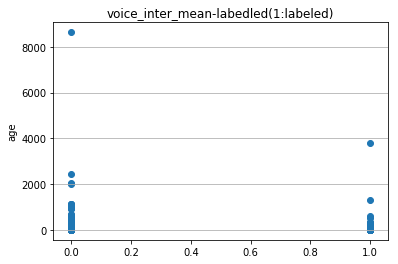

In [29]:
plt.scatter(train_feature.label, train_feature.voice_inter_mean)
plt.ylabel(u"age")
plt.grid(b=True, which='major',axis='y')
plt.title(u"voice_inter_mean-labedled(1:labeled)")

In [25]:
train_feature = uid_train
train_feature=pd.merge(train_feature,voice_inter,how='left',on='uid')
%matplotlib inline
import matplotlib.pyplot as plt


In [148]:
visit_cnt.describe()

,wa_visit_cnt_std,wa_visit_cnt_max,wa_visit_cnt_min,wa_visit_cnt_median,wa_visit_cnt_mean,wa_visit_cnt_sum
count,9773.000000,9899.000000,9899.000000,9899.000000,9899.000000,9999.000000
mean,95.438877,1338.388019,1.013032,3.765885,29.008505,38996.024202
std,111.882550,2240.580166,0.264281,2.205890,25.847383,53641.245295
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,26.929592,211.500000,1.000000,3.000000,10.958930,2073.500000
50%,71.875312,806.000000,1.000000,4.000000,24.796875,17861.000000
75%,133.520117,1813.000000,1.000000,4.000000,40.451933,54980.500000
max,3923.559488,93051.000000,20.000000,57.000000,652.337662,524144.000000
